In [136]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [137]:
df=pd.read_csv('amazon_delivery.csv')
df

,Order_ID,Agent_Age,Agent_Rating,Store_Latitude,Store_Longitude,Drop_Latitude,Drop_Longitude,Order_Date,Order_Time,Pickup_Time,Weather,Traffic,Vehicle,Area,Delivery_Time,Category
0,ialx566343618,37,4.9,22.745049,75.892471,22.765049,75.912471,2022-03-19,11:30:00,11:45:00,Sunny,High,motorcycle,Urban,120,Clothing
1,akqg208421122,34,4.5,12.913041,77.683237,13.043041,77.813237,2022-03-25,19:45:00,19:50:00,Stormy,Jam,scooter,Metropolitian,165,Electronics
2,njpu434582536,23,4.4,12.914264,77.678400,12.924264,77.688400,2022-03-19,08:30:00,08:45:00,Sandstorms,Low,motorcycle,Urban,130,Sports
3,rjto796129700,38,4.7,11.003669,76.976494,11.053669,77.026494,2022-04-05,18:00:00,18:10:00,Sunny,Medium,motorcycle,Metropolitian,105,Cosmetics
4,zguw716275638,32,4.6,12.972793,80.249982,13.012793,80.289982,2022-03-26,13:30:00,13:45:00,Cloudy,High,scooter,Metropolitian,150,Toys
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43734,jlxf819993117,30,4.8,26.902328,75.794257,26.912328,75.804257,2022-03-24,11:35:00,11:45:00,Windy,High,motorcycle,Metropolitian,160,Home
43735,aevx342135787,21,4.6,0.000000,0.000000,0.070000,0.070000,2022-02-16,19:55:00,20:10:00,Windy,Jam,motorcycle,Metropolitian,180,Jewelry
43736,xnek760674819,30,4.9,13.022394,80.242439,13.052394,80.272439,2022-03-11,23:50:00,00:05:00,Cloudy,Low,scooter,Metropolitian,80,Home
43737,cynl434665991,20,4.7,11.001753,76.986241,11.041753,77.026241,2022-03-07,13:35:00,13:40:00,Cloudy,High,motorcycle,Metropolitian,130,Kitchen


In [138]:
df.isnull().sum()

Order_ID            0
Agent_Age           0
Agent_Rating       54
Store_Latitude      0
Store_Longitude     0
Drop_Latitude       0
Drop_Longitude      0
Order_Date          0
Order_Time          0
Pickup_Time         0
Weather            91
Traffic             0
Vehicle             0
Area                0
Delivery_Time       0
Category            0
dtype: int64

In [139]:
df['Weather'].value_counts()

Weather
Fog           7440
Stormy        7374
Cloudy        7288
Sandstorms    7245
Windy         7223
Sunny         7078
Name: count, dtype: int64

In [140]:
df['Agent_Rating'] = df['Agent_Rating'].fillna(df['Agent_Rating'].median())

In [141]:
print(df['Agent_Rating'].value_counts().sort_index())


Agent_Rating
1.0      38
2.5      20
2.6      22
2.7      22
2.8      19
2.9      19
3.0       6
3.1      29
3.2      29
3.3      25
3.4      32
3.5     249
3.6     207
3.7     225
3.8     228
3.9     197
4.0    1077
4.1    1430
4.2    1418
4.3    1409
4.4    1361
4.5    3303
4.6    6940
4.7    7196
4.8    7148
4.9    7041
5.0    3996
6.0      53
Name: count, dtype: int64


In [142]:
# Fill missing Weather with mode
df['Weather'] = df['Weather'].fillna(df['Weather'].mode()[0])


In [143]:
df['Traffic'].value_counts()

Traffic
Low        14999
Jam        13725
Medium     10628
High        4296
NaN           91
Name: count, dtype: int64

In [144]:
pd.crosstab(df['Weather'], df['Traffic'])


Traffic,High,Jam,Low,Medium,NaN
Weather,,,,,
Cloudy,717,2267,2525,1779,0
Fog,757,2365,2520,1798,91
Sandstorms,678,2316,2520,1731,0
Stormy,713,2259,2619,1783,0
Sunny,716,2232,2401,1729,0
Windy,715,2286,2414,1808,0


In [145]:
print(df['Traffic'].dtype)


object


In [146]:

# Step 1: Standardize all values (remove spaces, lowercase for consistency)
df['Traffic'] = df['Traffic'].astype(str).str.strip().str.lower()

# Step 2: Convert "nan" string to real np.nan
df['Traffic'] = df['Traffic'].replace('nan', np.nan)

# Step 3: Fill missing with mode
traffic_mode = df['Traffic'].mode()[0]
df['Traffic'] = df['Traffic'].fillna(traffic_mode)

# Step 4: Verify
print("Missing Traffic values:", df['Traffic'].isna().sum())
print(df['Traffic'].value_counts(dropna=False))



Missing Traffic values: 0
Traffic
low       15090
jam       13725
medium    10628
high       4296
Name: count, dtype: int64


### outliers for numerical column

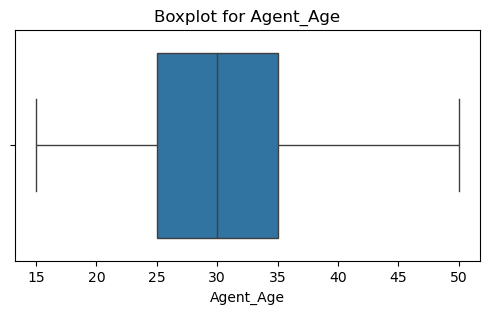

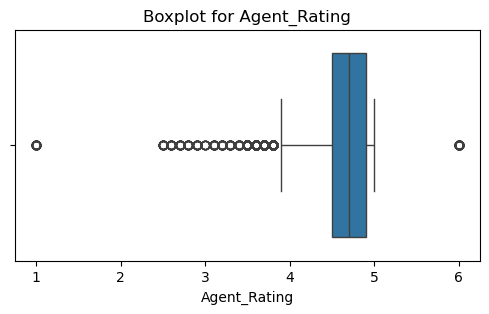

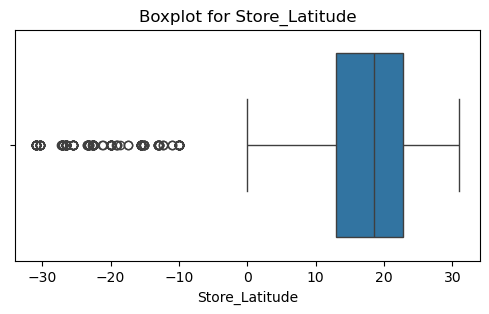

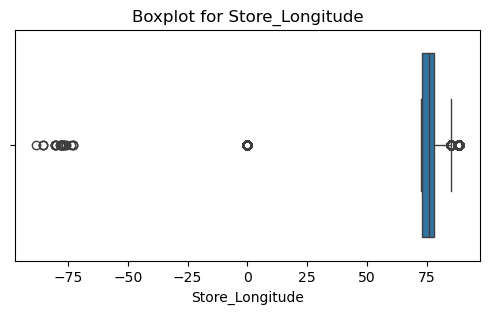

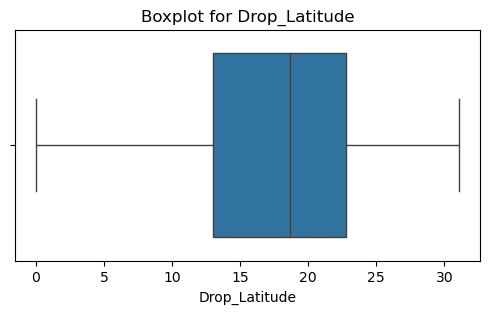

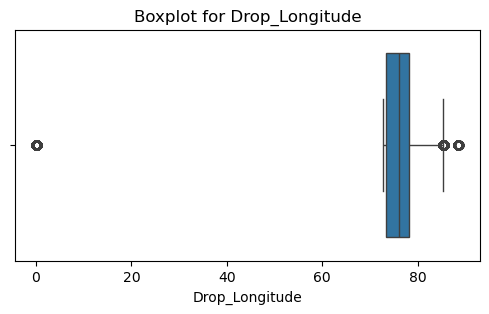

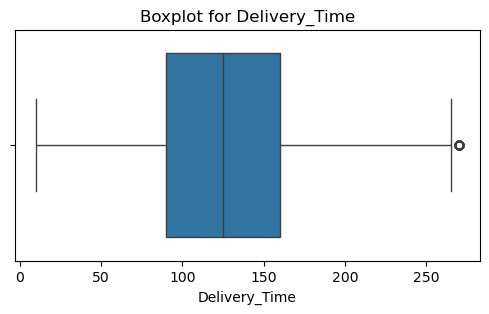

In [147]:
num_cols = ['Agent_Age','Agent_Rating',
            'Store_Latitude','Store_Longitude',
            'Drop_Latitude','Drop_Longitude',
            'Delivery_Time']

# Boxplots
for col in num_cols:
    plt.figure(figsize=(6,3))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot for {col}')
    plt.show()


In [148]:
df.describe()

,Agent_Age,Agent_Rating,Store_Latitude,Store_Longitude,Drop_Latitude,Drop_Longitude,Delivery_Time
count,43739.000000,43739.000000,43739.000000,43739.000000,43739.000000,43739.000000,43739.000000
mean,29.567137,4.633862,17.210960,70.661177,17.459031,70.821842,124.905645
std,5.815155,0.334518,7.764225,21.475005,7.342950,21.153148,51.915451
min,15.000000,1.000000,-30.902872,-88.366217,0.010000,0.010000,10.000000
25%,25.000000,4.500000,12.933298,73.170283,12.985996,73.280000,90.000000
50%,30.000000,4.700000,18.551440,75.898497,18.633626,76.002574,125.000000
75%,35.000000,4.900000,22.732225,78.045359,22.785049,78.104095,160.000000
max,50.000000,6.000000,30.914057,88.433452,31.054057,88.563452,270.000000


In [149]:
# Remove unrealistic agent ages
df = df[(df['Agent_Age'] >= 18) & (df['Agent_Age'] <= 65)]


In [150]:
# cap ratings above 5
df.loc[df['Agent_Rating'] > 5, 'Agent_Rating'] = 5  


### We should convert them into distance features because that’s what actually affects delivery time.

In [151]:
def haversine(lat1, lon1, lat2, lon2):
    R = 6371  # Earth radius in km
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = np.sin(dlat/2)**2 + np.cos(lat1)*np.cos(lat2)*np.sin(dlon/2)**2
    c = 2 * np.arcsin(np.sqrt(a))
    return R * c

df['Distance_km'] = haversine(df['Store_Latitude'], df['Store_Longitude'],
                               df['Drop_Latitude'], df['Drop_Longitude'])

C:\Users\ATHER\AppData\Local\Temp\ipykernel_8784\2763955658.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Distance_km'] = haversine(df['Store_Latitude'], df['Store_Longitude'],


In [152]:
df.head(3)

,Order_ID,Agent_Age,Agent_Rating,Store_Latitude,Store_Longitude,Drop_Latitude,Drop_Longitude,Order_Date,Order_Time,Pickup_Time,Weather,Traffic,Vehicle,Area,Delivery_Time,Category,Distance_km
0,ialx566343618,37,4.9,22.745049,75.892471,22.765049,75.912471,2022-03-19,11:30:00,11:45:00,Sunny,high,motorcycle,Urban,120,Clothing,3.025149
1,akqg208421122,34,4.5,12.913041,77.683237,13.043041,77.813237,2022-03-25,19:45:00,19:50:00,Stormy,jam,scooter,Metropolitian,165,Electronics,20.183530
2,njpu434582536,23,4.4,12.914264,77.678400,12.924264,77.688400,2022-03-19,08:30:00,08:45:00,Sandstorms,low,motorcycle,Urban,130,Sports,1.552758


In [153]:
print(df['Distance_km'].describe())


count    43701.000000
mean        35.479128
std        485.257293
min          1.465067
25%          4.663432
50%          9.220450
75%         13.682165
max      19692.674606
Name: Distance_km, dtype: float64


In [154]:
df['Area'].value_counts()

Area
Metropolitian     32671
Urban              9740
Other              1138
Semi-Urban          152
Name: count, dtype: int64

In [155]:
df.groupby("Area")["Distance_km"].describe()


,count,mean,std,min,25%,50%,75%,max
Area,,,,,,,,
Metropolitian,32671.0,34.958338,482.850741,1.465067,4.717601,9.326428,13.773738,19692.674606
Other,1138.0,58.171059,817.020710,1.465140,4.610162,9.055693,12.580268,18098.786774
Semi-Urban,152.0,12.875146,4.873466,1.509376,10.641559,12.580268,16.818771,20.852514
Urban,9740.0,34.927497,443.287130,1.465123,4.544228,7.862668,13.216693,17663.045927


In [156]:
# IQR thresholds based on your summary table
iqr_thresholds = {
    "Metropolitian": {"Q1": 4.717601, "Q3": 13.773738},
    "Other": {"Q1": 4.610162, "Q3": 12.580268},
    "Semi-Urban": {"Q1": 10.641559, "Q3": 16.818771},
    "Urban": {"Q1": 4.544228, "Q3": 13.216693}
}

# Dictionary to store number of outliers per area
outliers_by_area = {}

# Detect outliers for each area
for area, subset in df.groupby("Area"):
    if area in iqr_thresholds:
        Q1 = iqr_thresholds[area]["Q1"]
        Q3 = iqr_thresholds[area]["Q3"]
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        
        # Select rows outside the IQR range
        outliers = subset[(subset["Distance_km"] < lower) | (subset["Distance_km"] > upper)]
        outliers_by_area[area] = len(outliers)

# Print results
print("Outliers detected by IQR per Area (based on your summary stats):")
print(outliers_by_area)

Outliers detected by IQR per Area (based on your summary stats):
{'Other': 5}


In [157]:
# Define realistic max distances per Area
thresholds = {
    "Urban": 50,
    "Metropolitian": 50,
    "Semi-Urban": 100,
    "Other": 100
}

# Function to cap Distance_km
def cap_distance(row):
    max_dist = thresholds.get(row["Area"], 100)  # fallback 100 if Area missing
    return min(row["Distance_km"], max_dist)

# Apply the cap to the dataset
df["Distance_km"] = df.apply(cap_distance, axis=1)

# Check result
print(df.groupby("Area")["Distance_km"].max())


Area
Metropolitian     100.000000
Other             100.000000
Semi-Urban         20.852514
Urban             100.000000
Name: Distance_km, dtype: float64


C:\Users\ATHER\AppData\Local\Temp\ipykernel_8784\142751288.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Distance_km"] = df.apply(cap_distance, axis=1)


In [158]:
df.groupby("Area")["Delivery_Time"].describe()


,count,mean,std,min,25%,50%,75%,max
Area,,,,,,,,
Metropolitian,32671.0,129.697316,51.590611,10.0,95.00,130.0,165.00,270.0
Other,1138.0,104.464851,45.943400,10.0,75.00,100.0,135.00,270.0
Semi-Urban,152.0,238.552632,47.033282,44.0,238.75,245.0,261.25,270.0
Urban,9740.0,109.427721,48.203885,10.0,75.00,105.0,140.00,270.0


In [159]:
# Define min and max per Area
delivery_thresholds = {
    "Metropolitian": {"min": 60, "max": 240},
    "Urban": {"min": 60, "max": 240},
    "Other": {"min": 60, "max": 240},
    "Semi-Urban": {"min": 44, "max": 270}
}

# Function to cap Delivery_Time
def cap_delivery_time(row):
    thresholds = delivery_thresholds.get(row["Area"], {"min": 60, "max": 240})
    return min(max(row["Delivery_Time"], thresholds["min"]), thresholds["max"])

# Apply capping
df["Delivery_Time"] = df.apply(cap_delivery_time, axis=1)

# Check results
df.groupby("Area")["Delivery_Time"].describe()


C:\Users\ATHER\AppData\Local\Temp\ipykernel_8784\4248501220.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Delivery_Time"] = df.apply(cap_delivery_time, axis=1)


,count,mean,std,min,25%,50%,75%,max
Area,,,,,,,,
Metropolitian,32671.0,131.645190,47.315240,60.0,95.00,130.0,165.0,240.0
Other,1138.0,107.447276,41.415790,60.0,75.00,100.0,135.0,240.0
Semi-Urban,152.0,228.914474,40.111260,60.0,238.75,240.0,240.0,240.0
Urban,9740.0,112.072895,43.947163,60.0,75.00,105.0,140.0,240.0


In [160]:
for col in ["Weather", "Traffic", "Vehicle", "Area", "Category"]:
    print(df[col].value_counts())
    print("\n")


Weather
Fog           7493
Stormy        7374
Cloudy        7288
Sandstorms    7245
Windy         7223
Sunny         7078
Name: count, dtype: int64


Traffic
low       15052
jam       13725
medium    10628
high       4296
Name: count, dtype: int64


Vehicle
motorcycle     25523
scooter        14626
van             3545
bicycle            7
Name: count, dtype: int64


Area
Metropolitian     32671
Urban              9740
Other              1138
Semi-Urban          152
Name: count, dtype: int64


Category
Electronics     2846
Books           2821
Jewelry         2798
Toys            2780
Skincare        2770
Snacks          2767
Outdoors        2744
Apparel         2725
Sports          2715
Grocery         2691
Pet Supplies    2688
Home            2682
Cosmetics       2675
Kitchen         2670
Shoes           2665
Clothing        2664
Name: count, dtype: int64




In [161]:
df.describe()

,Agent_Age,Agent_Rating,Store_Latitude,Store_Longitude,Drop_Latitude,Drop_Longitude,Delivery_Time,Distance_km
count,43701.000000,43701.000000,43701.000000,43701.000000,43701.000000,43701.000000,43701.000000,43701.000000
mean,29.579804,4.635809,17.220955,70.685926,17.461092,70.821604,126.991144,10.101135
std,5.801789,0.313707,7.747106,21.392773,7.343421,21.153298,47.604171,8.021149
min,20.000000,2.500000,-30.902872,-88.366217,0.010000,0.010000,60.000000,1.465067
25%,25.000000,4.500000,12.933298,73.170283,12.985996,73.280000,90.000000,4.663432
50%,30.000000,4.700000,18.551440,75.898497,18.633934,76.002471,125.000000,9.220450
75%,35.000000,4.900000,22.732225,78.045359,22.785207,78.104095,160.000000,13.682165
max,50.000000,5.000000,30.914057,88.433452,31.054057,88.563452,240.000000,100.000000


In [162]:
df.head()

,Order_ID,Agent_Age,Agent_Rating,Store_Latitude,Store_Longitude,Drop_Latitude,Drop_Longitude,Order_Date,Order_Time,Pickup_Time,Weather,Traffic,Vehicle,Area,Delivery_Time,Category,Distance_km
0,ialx566343618,37,4.9,22.745049,75.892471,22.765049,75.912471,2022-03-19,11:30:00,11:45:00,Sunny,high,motorcycle,Urban,120,Clothing,3.025149
1,akqg208421122,34,4.5,12.913041,77.683237,13.043041,77.813237,2022-03-25,19:45:00,19:50:00,Stormy,jam,scooter,Metropolitian,165,Electronics,20.183530
2,njpu434582536,23,4.4,12.914264,77.678400,12.924264,77.688400,2022-03-19,08:30:00,08:45:00,Sandstorms,low,motorcycle,Urban,130,Sports,1.552758
3,rjto796129700,38,4.7,11.003669,76.976494,11.053669,77.026494,2022-04-05,18:00:00,18:10:00,Sunny,medium,motorcycle,Metropolitian,105,Cosmetics,7.790401
4,zguw716275638,32,4.6,12.972793,80.249982,13.012793,80.289982,2022-03-26,13:30:00,13:45:00,Cloudy,high,scooter,Metropolitian,150,Toys,6.210138
